In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from matplotlib import rc
import pandas as pd

# Ag13

In [37]:
cd ag13

/Users/esteban/quantumEspresso/ag13


In [38]:
cd dos2

/Users/esteban/quantumEspresso/ag13/dos2


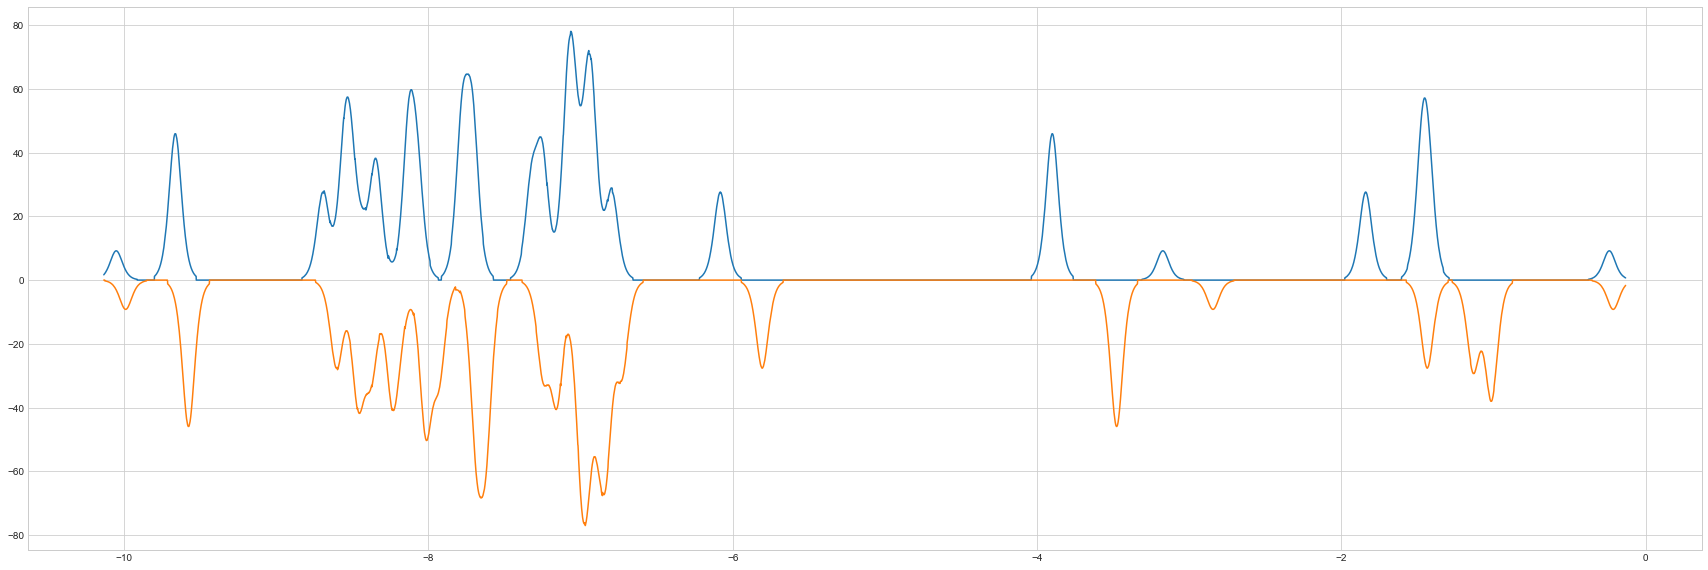

In [41]:
mag = np.loadtxt('ag13.dos.pdos_tot')
fig, ax = plt.subplots()
plt.plot(mag[:,0],mag[:,1])
plt.plot(mag[:,0],-mag[:,2])
fig.set_size_inches(30, 10)

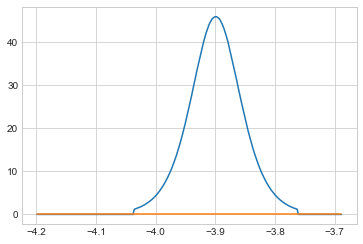

In [44]:
mag_ = mag[mag[:,0]>-4.2]
mag_ = mag_[mag_[:,0]<-3.6881]

fig, ax = plt.subplots()
plt.plot(mag_[:,0],mag_[:,1])
plt.plot(mag_[:,0],-mag_[:,2])

In [45]:
mag_[:,1].sum()*0.001

4.936379999999999

# Atomo Lateral de Ag13

In [51]:
temp1 = np.loadtxt('ag13.dos.pdos_atm#2(Ag)_wfc#1(s)')

mag_s = temp1[:,[0]]
mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag13.dos.pdos_atm#2(Ag)_wfc#2(p)')

mag_p = temp1[:,[0]]
mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag13.dos.pdos_atm#2(Ag)_wfc#3(d)')

mag_d = temp1[:,[0]]
mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
mag_d = np.append(mag_d, temp1[:,[2]], axis=1)

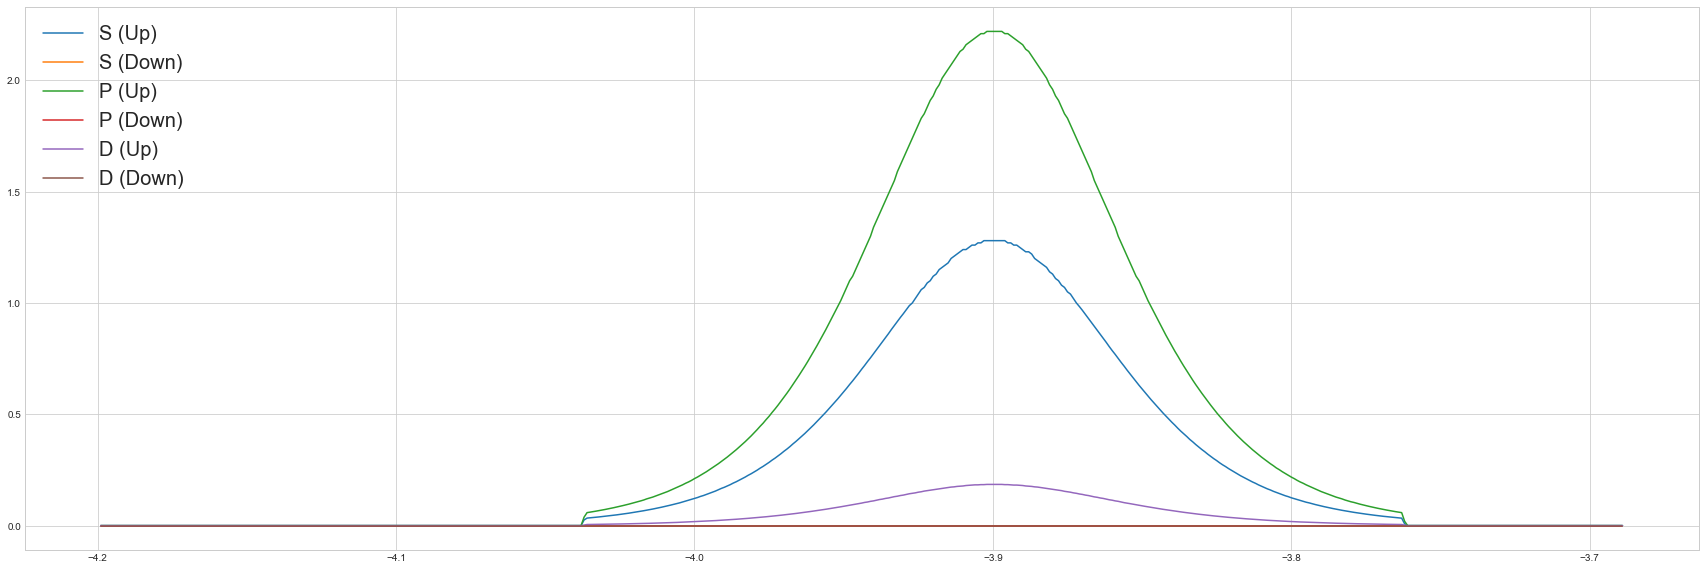

In [52]:
mag_s = mag_s[mag_s[:,0]>-4.2]
mag_s = mag_s[mag_s[:,0]<-3.6881]

mag_p = mag_p[mag_p[:,0]>-4.2]
mag_p = mag_p[mag_p[:,0]<-3.6881]

mag_d = mag_d[mag_d[:,0]>-4.2]
mag_d = mag_d[mag_d[:,0]<-3.6881]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

In [53]:
(mag_s[:,1]+mag_p[:,1]+mag_d[:,1]).sum()*0.001

0.39643462

# Átomo Central de Ag13

In [54]:
temp1 = np.loadtxt('ag13.dos.pdos_atm#8(Ag)_wfc#1(s)')

mag_s = temp1[:,[0]]
mag_s = np.append(mag_s, temp1[:,[1]], axis=1)
mag_s = np.append(mag_s, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag13.dos.pdos_atm#8(Ag)_wfc#2(p)')

mag_p = temp1[:,[0]]
mag_p = np.append(mag_p, temp1[:,[1]], axis=1)
mag_p = np.append(mag_p, temp1[:,[2]], axis=1)

temp1 = np.loadtxt('ag13.dos.pdos_atm#8(Ag)_wfc#3(d)')

mag_d = temp1[:,[0]]
mag_d = np.append(mag_d, temp1[:,[1]], axis=1)
mag_d = np.append(mag_d, temp1[:,[2]], axis=1)

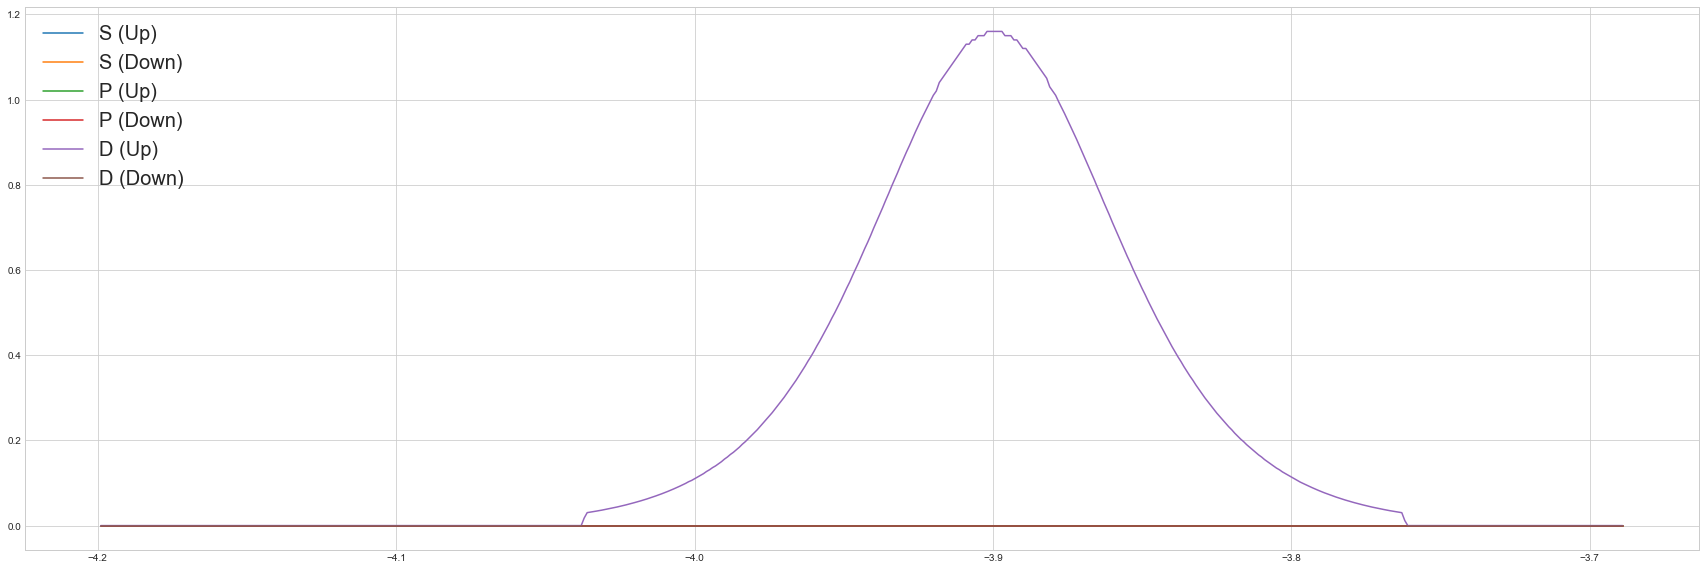

In [55]:
mag_s = mag_s[mag_s[:,0]>-4.2]
mag_s = mag_s[mag_s[:,0]<-3.6881]

mag_p = mag_p[mag_p[:,0]>-4.2]
mag_p = mag_p[mag_p[:,0]<-3.6881]

mag_d = mag_d[mag_d[:,0]>-4.2]
mag_d = mag_d[mag_d[:,0]<-3.6881]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

In [56]:
(mag_s[:,1]+mag_p[:,1]+mag_d[:,1]).sum()*0.001

0.12460922602187799

# Ag12Bic

In [ ]:
ls

MyDrive/


In [ ]:
cd ..

/content/drive


In [ ]:
cd ag12bic

/content/drive/MyDrive/tesis_datos_final/ag12bic


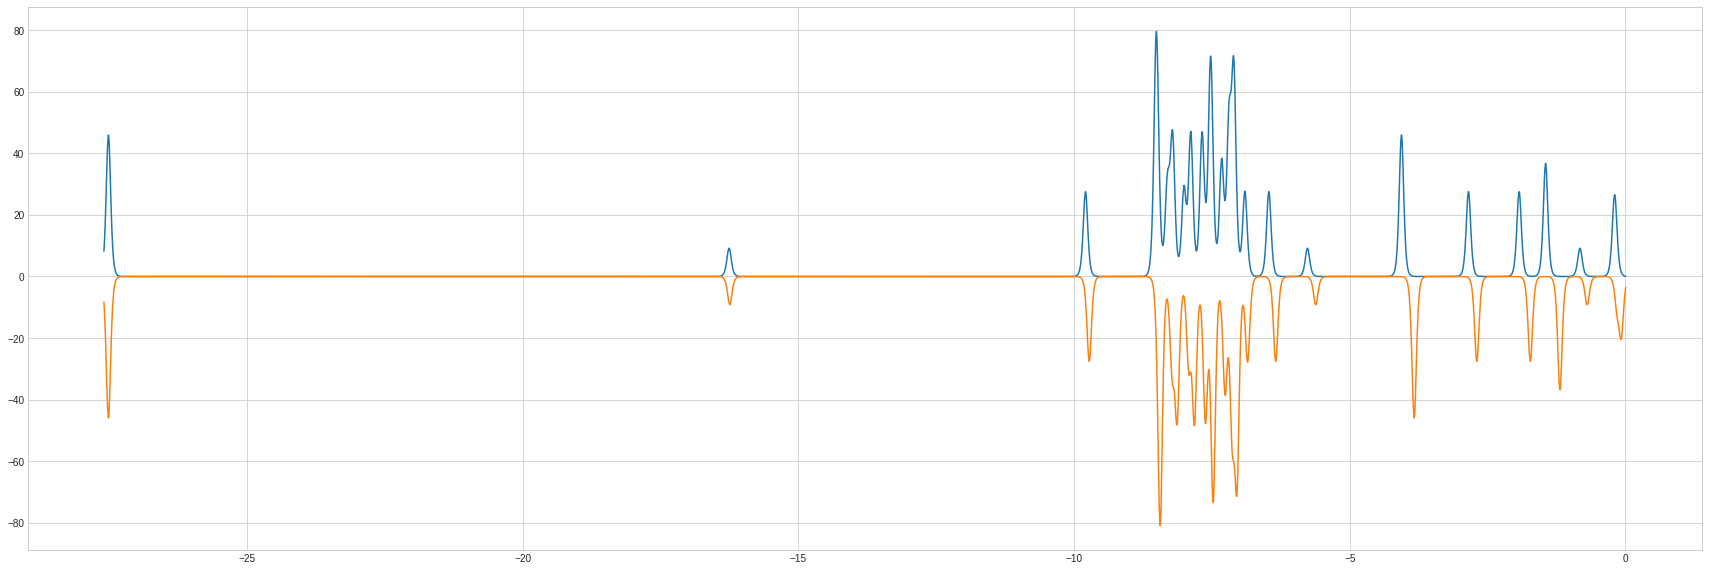

In [ ]:
mag = np.loadtxt('ag12Bic.dos')
fig, ax = plt.subplots()
plt.plot(mag[:,0],mag[:,1])
plt.plot(mag[:,0],-mag[:,2])
fig.set_size_inches(30, 10)

In [ ]:
mag = mag[mag[:,0]>-5]
mag = mag[mag[:,0]<-3.843]

In [ ]:
mag[:,1].sum()*0.0007-mag[:,2].sum()*0.0007

3.019422301190512

#Átomo Lateral

In [ ]:
temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#1(Ag)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bic.dos.pdos_atm#1(Ag)_wfc#2(s)')

mag_s = temp1[:,[0]]
mag_s = np.append(mag_s, temp1[:,[1]]+temp2[:,[1]], axis=1)
mag_s = np.append(mag_s, temp1[:,[2]]+temp2[:,[2]], axis=1)

temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#1(Ag)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bic.dos.pdos_atm#1(Ag)_wfc#4(p)')

mag_p = temp1[:,[0]]
mag_p = np.append(mag_p, temp1[:,[1]]+temp2[:,[1]], axis=1)
mag_p = np.append(mag_p, temp1[:,[2]]+temp2[:,[2]], axis=1)

temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#1(Ag)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bic.dos.pdos_atm#1(Ag)_wfc#6(d)')

mag_d = temp1[:,[0]]
mag_d = np.append(mag_d, temp1[:,[1]]+temp2[:,[1]], axis=1)
mag_d = np.append(mag_d, temp1[:,[2]]+temp2[:,[2]], axis=1)

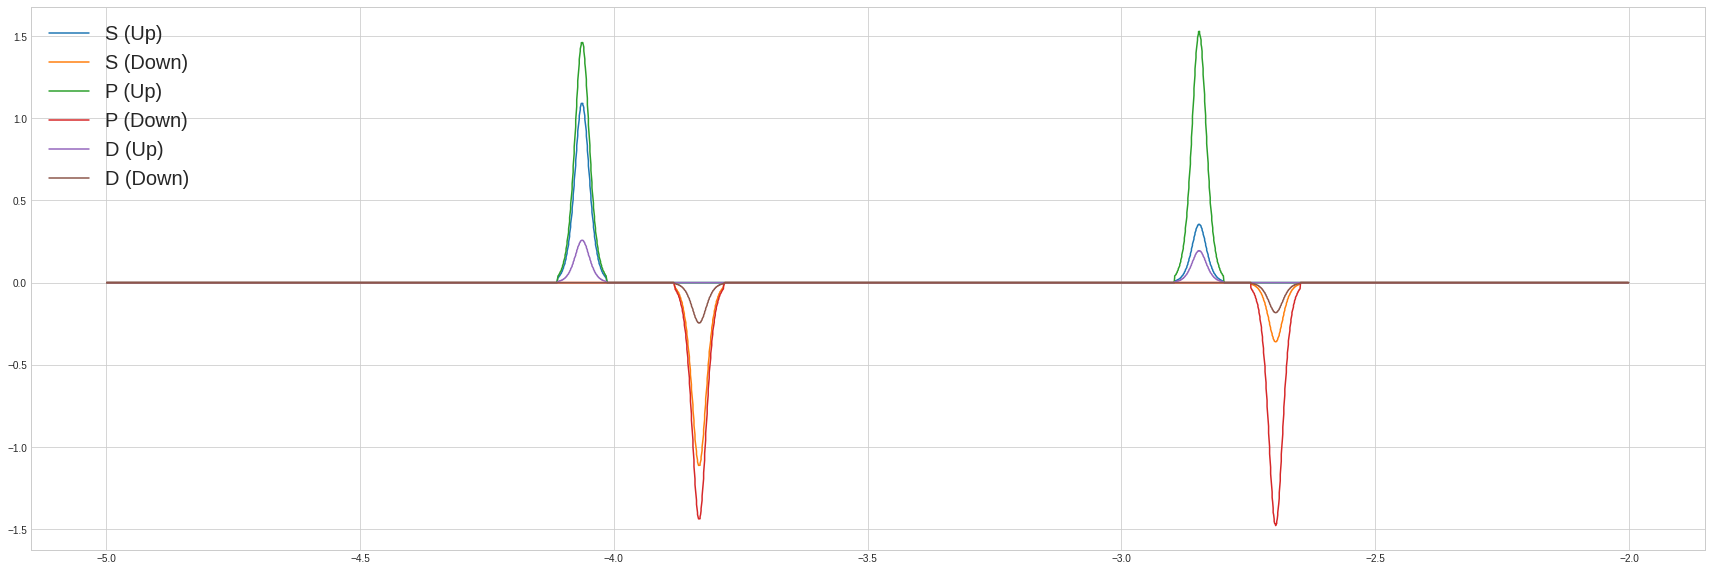

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-4]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-4]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-4]

In [ ]:
(mag_s[:,1]*0.0007+mag_p[:,1]*0.0007+mag_d[:,1]*0.0007).sum()*12*2.3-(mag_s[:,2]*0.0007+mag_p[:,2]*0.0007+mag_d[:,2]*0.0007).sum()*12*2.3

2.927245848996

#Átomo Central

In [ ]:
temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#8(Bi)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bic.dos.pdos_atm#8(Bi)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#8(Bi)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bic.dos.pdos_atm#8(Bi)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]]
mag_p[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]]

temp1 = np.loadtxt('ag12Bic.dos.pdos_atm#8(Bi)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bic.dos.pdos_atm#8(Bi)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

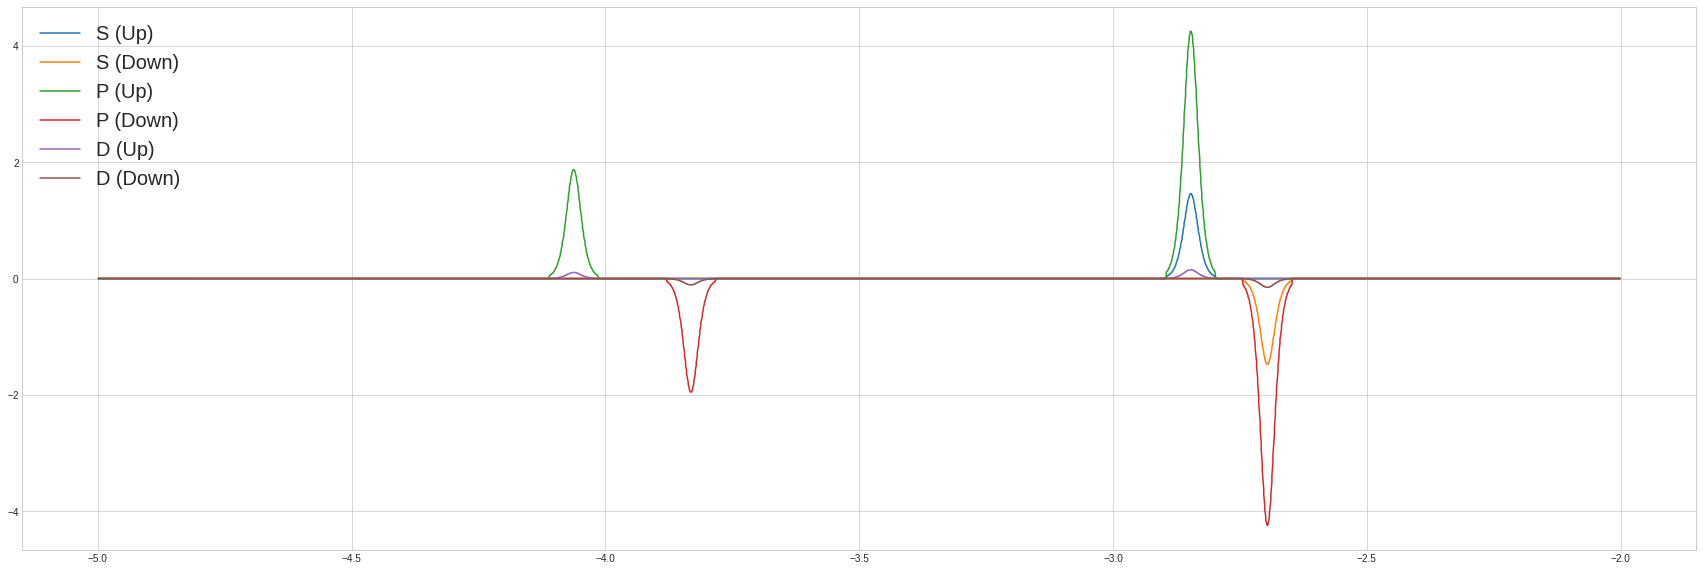

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-3.843]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-3.843]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-3.843]

In [ ]:
mag_s[:,1].sum()*0.0007+mag_p[:,1].sum()*0.0007+mag_d[:,1].sum()*0.0007*2.3

0.3074254078521986

#Ag12Bil

In [ ]:
cd ..

/content/drive/My Drive/tesis_datos_final


In [ ]:
cd Ag12bil

/content/drive/My Drive/tesis_datos_final/Ag12bil


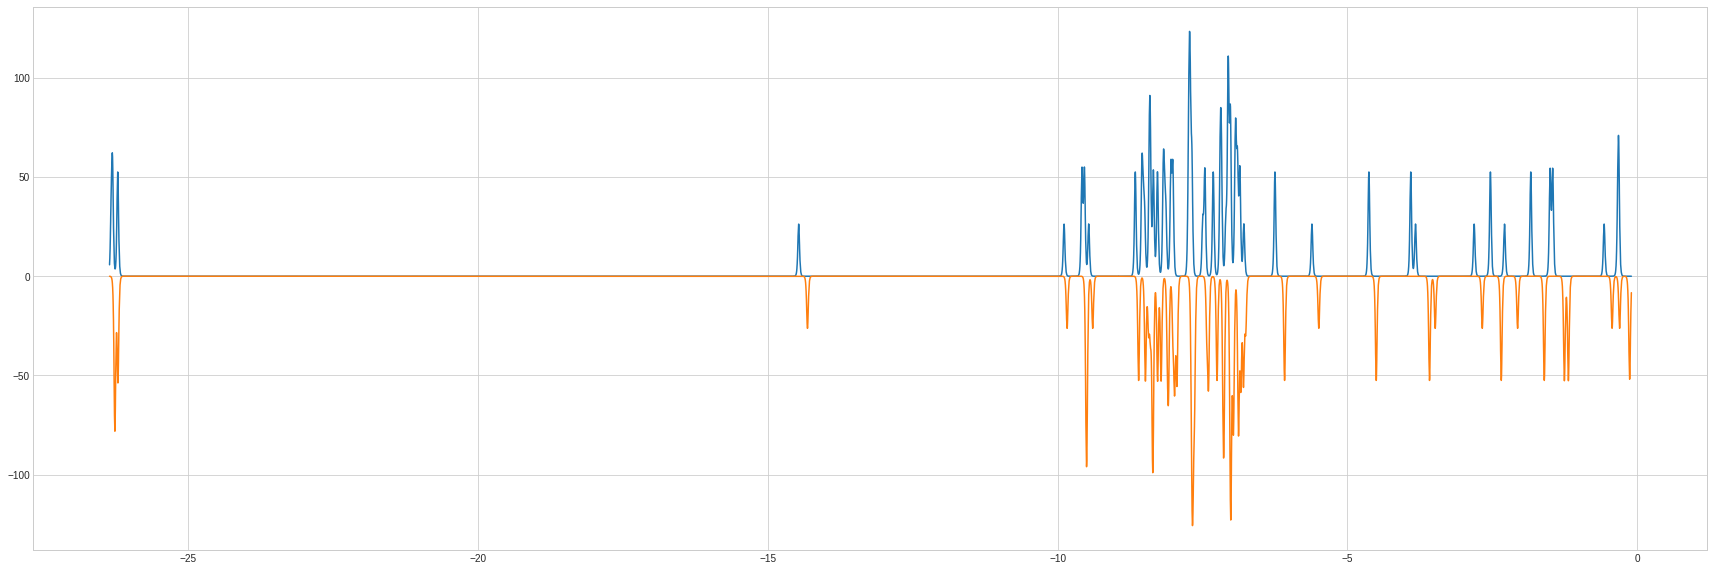

In [ ]:
mag = np.loadtxt('ag12Bil.dos')
fig, ax = plt.subplots()
plt.plot(mag[:,0],mag[:,1])
plt.plot(mag[:,0],-mag[:,2])
fig.set_size_inches(30, 10)

#Bismuto

In [ ]:
temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += (temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]])
mag_p[:,[2]] += (temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]])

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#10(Bi)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

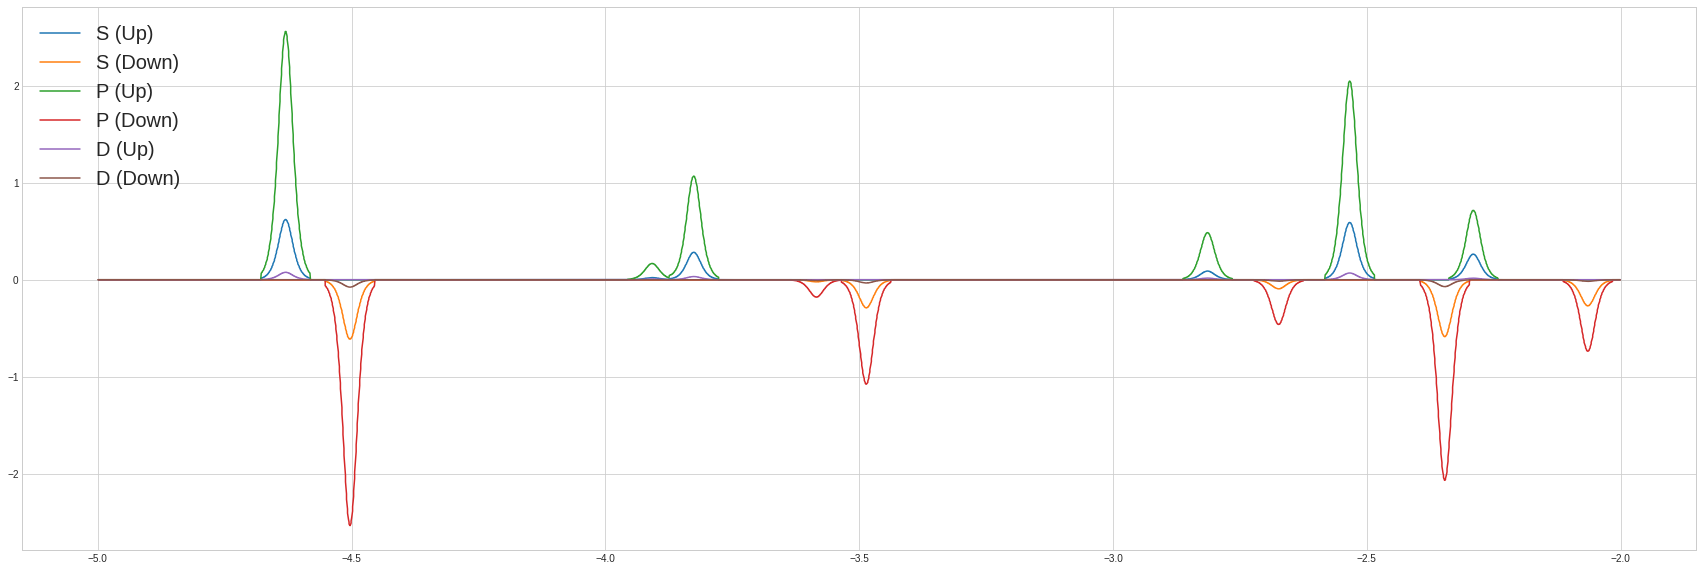

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

#Primer Vecino

In [ ]:
temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += (temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]])
mag_p[:,[2]] += (temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]])

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#2(Ag)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

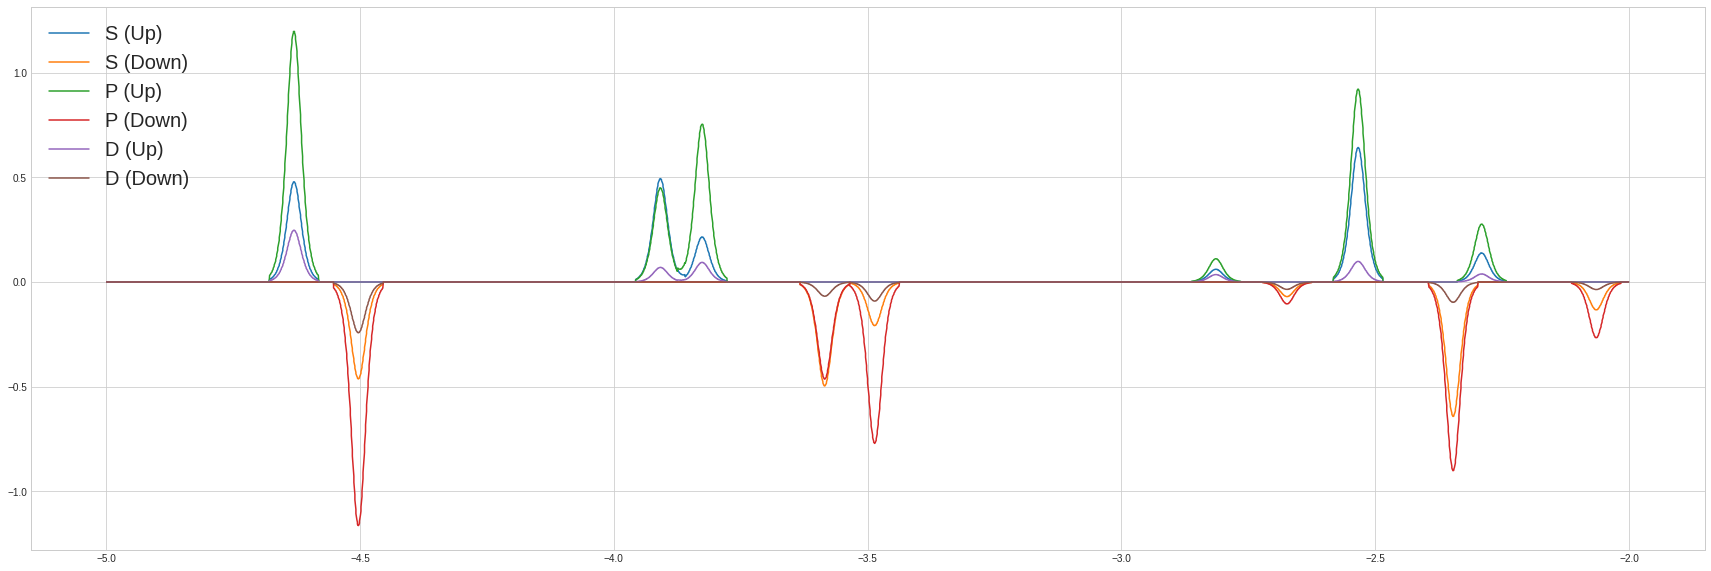

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

#Segundo Vecino

In [ ]:
temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += (temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]])
mag_p[:,[2]] += (temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]])

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#5(Ag)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

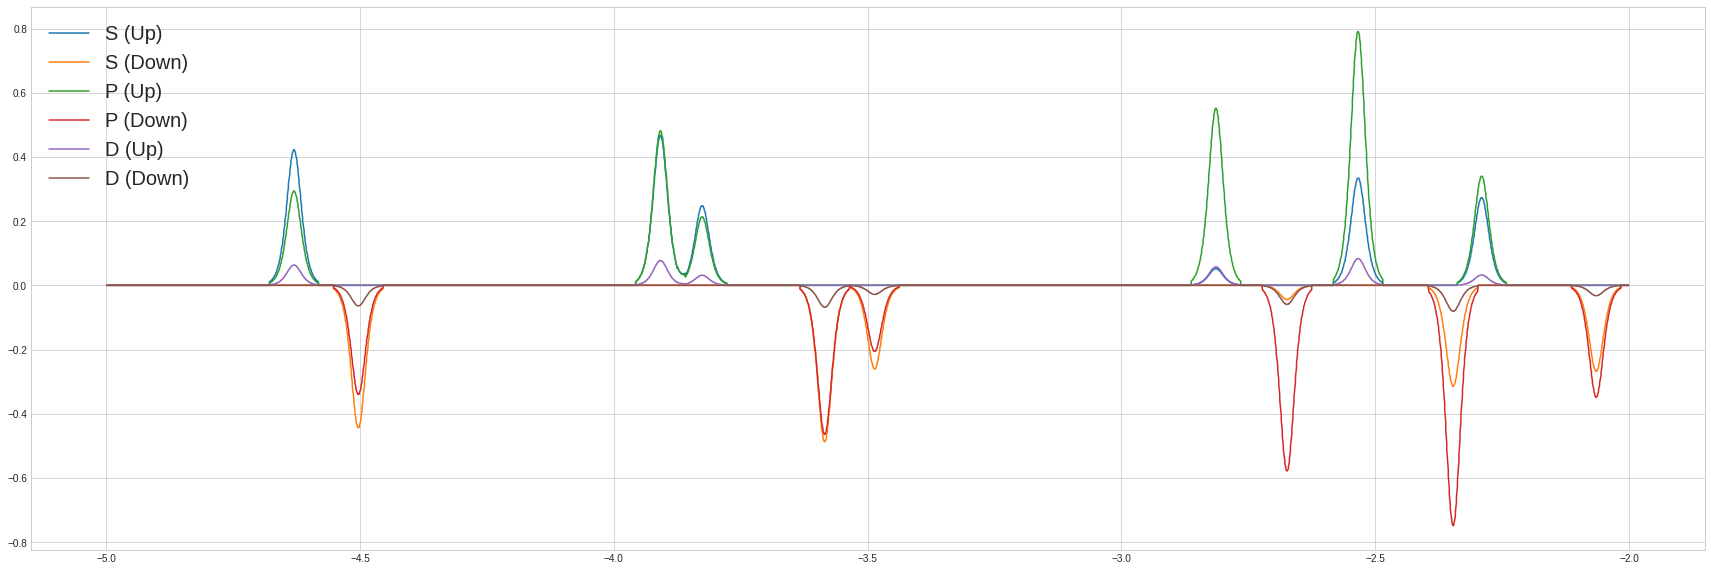

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

#Lejano

In [ ]:
temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += (temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]])
mag_p[:,[2]] += (temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]])

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#7(Ag)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

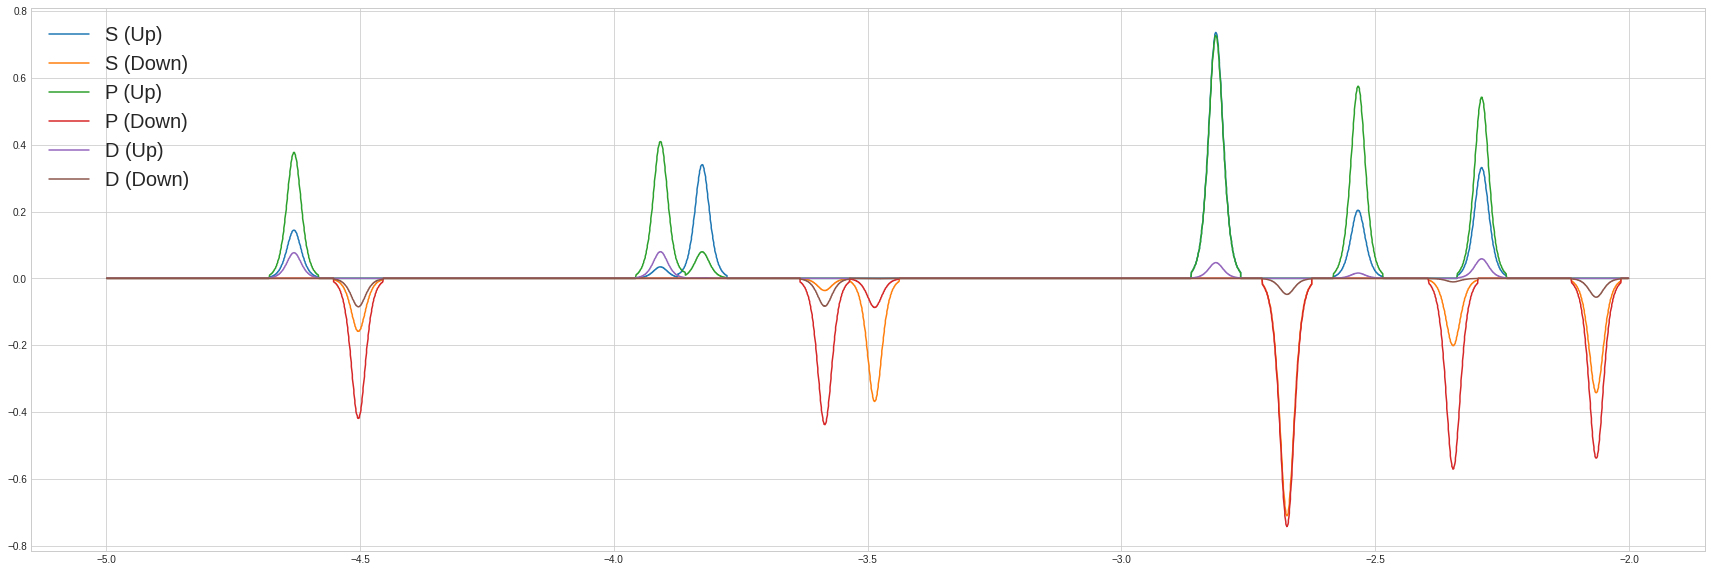

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()

#Central

In [ ]:
temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#1(s)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#2(s)')
mag_s = temp1[:,[0,3,4]]
mag_s[:,[1,2]] +=  temp2[:,[3,4]]

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#3(p)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#4(p)')

mag_p = temp1[:,[0,3,4]]
mag_p[:,[1]] += (temp1[:,[5]] + temp1[:,[7]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]])
mag_p[:,[2]] += (temp1[:,[6]] + temp1[:,[8]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]])

temp1 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#5(d)')
temp2 = np.loadtxt('ag12Bil.dos.pdos_atm#8(Ag)_wfc#6(d)')

mag_d = temp1[:,[0,3,4]]
mag_d[:,[1]] += temp1[:,[5]] + temp1[:,[7]] + temp1[:,[9]] + temp1[:,[11]] + temp2[:,[3]] + temp2[:,[5]] + temp2[:,[7]] + temp2[:,[9]] + temp2[:,[11]]
mag_d[:,[2]] += temp1[:,[6]] + temp1[:,[8]] + temp1[:,[10]] + temp1[:,[12]] + temp2[:,[4]] + temp2[:,[6]] + temp2[:,[8]] + temp2[:,[10]] + temp2[:,[12]]

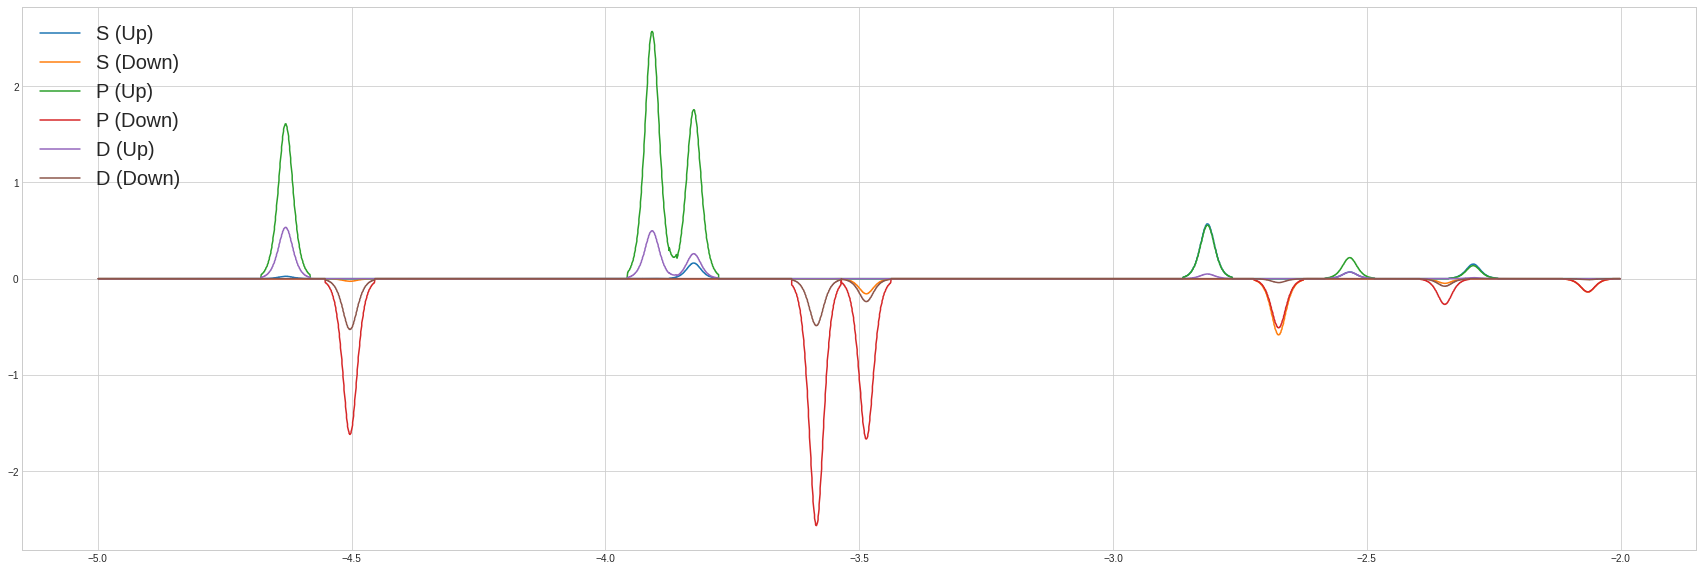

In [ ]:
mag_s = mag_s[mag_s[:,0]>-5]
mag_s = mag_s[mag_s[:,0]<-2]

mag_p = mag_p[mag_p[:,0]>-5]
mag_p = mag_p[mag_p[:,0]<-2]

mag_d = mag_d[mag_d[:,0]>-5]
mag_d = mag_d[mag_d[:,0]<-2]

fig, ax = plt.subplots()
plt.plot(mag_s[:,0],mag_s[:,1], label="S (Up)")
plt.plot(mag_s[:,0],-mag_s[:,2],label="S (Down)")
plt.plot(mag_p[:,0],mag_p[:,1], label="P (Up)")
plt.plot(mag_p[:,0],-mag_p[:,2], label="P (Down)")
plt.plot(mag_d[:,0],mag_d[:,1], label="D (Up)")
plt.plot(mag_d[:,0],-mag_d[:,2], label="D (Down)")
fig.set_size_inches(30, 10)
plt.legend(loc='upper left', fontsize=20)
plt.show()